In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as pyplot

In [6]:
!pip show pandas

Name: pandas
Version: 1.4.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: d:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages
Requires: pytz, python-dateutil, numpy
Required-by: statsmodels, seaborn


In [7]:
!pip install --upgrade pandas==1.4.2

In [10]:
diff = pd.read_csv('./diff.csv')
diff.shape

(1, 65)

In [11]:
diff

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,0,-0.199056,-0.040466,-0.034301,-0.045169,0.196959,-0.503442,0.165151,-0.115969,0.07204,...,-0.147089,-0.114145,0.028444,0.120295,-0.020843,0.075597,-0.085518,0.048289,-0.155566,0.08207


In [15]:
diff.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '60', '61', '62', '63'],
      dtype='object')

In [23]:
diff = diff.drop(columns=['Unnamed: 0'])
diff

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.199056,-0.040466,-0.034301,-0.045169,0.196959,-0.503442,0.165151,-0.115969,0.07204,0.214808,...,-0.147089,-0.114145,0.028444,0.120295,-0.020843,0.075597,-0.085518,0.048289,-0.155566,0.08207


In [29]:
rdf = pd.read_csv('./rdf.csv')
rdf.shape

(64, 2)

In [30]:
rdf

,Unnamed: 0,0
0,0,0.000032
1,1,0.090413
2,2,0.158989
3,3,0.587073
4,4,0.002474
...,...,...
59,59,0.040392
60,60,0.043294
61,61,0.075661
62,62,0.002442


In [36]:
rdf = rdf.drop(columns=['Unnamed: 0'])
rdf

,0
0,0.000032
1,0.090413
2,0.158989
3,0.587073
4,0.002474
...,...
59,0.040392
60,0.043294
61,0.075661
62,0.002442


In [44]:
rdf.iloc[:, 0].apply(lambda x: 0 if x > 0.01 else 1)

0     1
1     0
2     0
3     0
4     1
     ..
59    0
60    0
61    0
62    1
63    0
Name: 0, Length: 64, dtype: int64

In [93]:
diff_rdf = pd.concat([diff.T.reset_index(), rdf], axis=1).drop(columns=['index'])
diff_rdf

,0,0
0,-0.199056,0.000032
1,-0.040466,0.090413
2,-0.034301,0.158989
3,-0.045169,0.587073
4,0.196959,0.002474
...,...,...
59,0.075597,0.040392
60,-0.085518,0.043294
61,0.048289,0.075661
62,-0.155566,0.002442


In [94]:
norm = matplotlib.colors.Normalize(-1, 1)
colors = [[norm(-1.0), "cyan"],
        [norm(-0.6), "lightblue"],
        [norm(0.0), "black"],
        [norm(0.6), "lightyellow"],
        [norm(1.0), "yellow"]]

custom_color_map = LinearSegmentedColormap.from_list(
    "",
    colors=colors,
)

In [95]:
np.array(diff_rdf.iloc[:, 0]).reshape(64, -1).T

array([[-0.19905573, -0.04046608, -0.03430105, -0.04516891,  0.19695902,
        -0.5034418 ,  0.16515113, -0.11596861,  0.07204024,  0.21480793,
         0.20009589, -0.0932519 ,  0.09358702,  0.10126595,  0.39862746,
         0.04871985,  0.10526384, -0.38500652,  0.1929766 ,  0.09185514,
         0.2718469 ,  0.21955703,  0.04808212,  0.09744605, -0.17637262,
        -0.11405554,  0.33036122, -0.23367517,  0.16058642,  0.03190183,
         0.26704898, -0.17887385, -0.08312494,  0.2841816 , -0.02594088,
         0.12925008, -0.24953306,  0.05275662, -0.20139955,  0.10025719,
         0.37055048, -0.26487762, -0.25456902, -0.28993505,  0.19150443,
        -0.09246742, -0.4662676 , -0.01975596,  0.13082251,  0.20500676,
         0.20457518,  0.21488681,  0.04531046, -0.27053073, -0.14708881,
        -0.11414508,  0.02844436,  0.12029457, -0.02084268,  0.07559704,
        -0.08551759,  0.04828948, -0.15556566,  0.08207034]])

<AxesSubplot:>

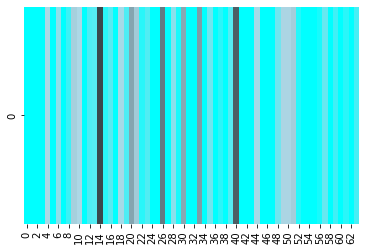

In [96]:
sns.heatmap(
    data=np.array(diff_rdf.iloc[:, 0]).reshape(64, -1).T,
    vmin=0,
    vmax=1.0,
    cbar=False,
    cmap=custom_color_map
)

### Filter by pvalue

which means put 0 when pvalue > 0.01

In [109]:
diff_rdf

,0,0
0,-0.199056,0.000032
1,-0.040466,0.090413
2,-0.034301,0.158989
3,-0.045169,0.587073
4,0.196959,0.002474
...,...,...
59,0.075597,0.040392
60,-0.085518,0.043294
61,0.048289,0.075661
62,-0.155566,0.002442


In [110]:
f = diff_rdf

In [118]:
for i in range(len(f.iloc[:, 0])):
    if f.iloc[i, 1] > 0.01:
        f.iloc[i, 0] = 0.5

In [119]:
f

,0,0
0,-0.199056,0.000032
1,0.500000,0.090413
2,0.500000,0.158989
3,0.500000,0.587073
4,0.196959,0.002474
...,...,...
59,0.500000,0.040392
60,0.500000,0.043294
61,0.500000,0.075661
62,-0.155566,0.002442


<AxesSubplot:>

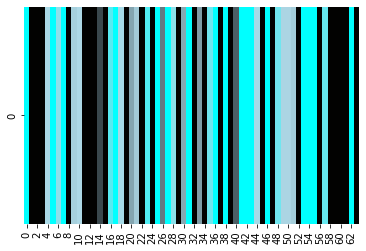

In [120]:
sns.heatmap(
    data=np.array(f.iloc[:, 0]).reshape(64, -1).T,
    vmin=0,
    vmax=1.0,
    cbar=False,
    cmap=custom_color_map
)